In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Make dataset
from sklearn.datasets import make_regression
# X,y=make_regression(n_samples=100, n_features=1, noise=50)
X=[5,10,12,14,18,30,33,55,65,80,100,150]
y=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]

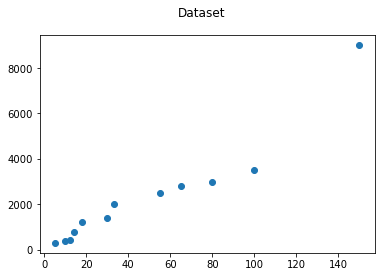

In [59]:
# Create train and test set from dataset
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
series_dict={'X':X,'y':y}
df=pd.DataFrame(series_dict)
X_train=df[['X']]
y_train=df[['y']]

plt.clf()
plt.suptitle('Dataset')
plt.scatter(X,y)
plt.savefig("../img/001.svg")
plt.show()

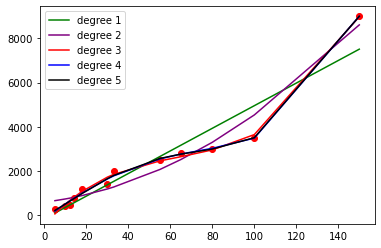

In [82]:
# Train polynomial feature linear regression mode
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

scores=[]
coefs=[]
intercepts=[]
colors=['green', 'purple', 'red', 'blue', 'black']
degrees=[1, 2, 3 ,4, 5]
plt.scatter(X_train, y_train, color='red')
for count,degree in enumerate(degrees):
    model=Pipeline([('Poly', PolynomialFeatures(degree)),
                    ('Linear', LinearRegression())])
    model.fit(X_train, y_train)
    scores.append(model.score(X_train, y_train))
    coefs.append(model.named_steps["Linear"].coef_)
    intercepts.append(model.named_steps["Linear"].intercept_)
    plt.plot(X_train,model.predict(X_train),color=colors[count], label='degree %d' %degree)
    
plt.legend(loc=2)
plt.show()


In [83]:
for count,degree in enumerate(degrees):
    print("====== degree ", degree)
    print("Scores: ", scores[count])
    print("Coefficients : ", coefs[count])
    print("Intercept : ", intercepts[count])

====== degree  1
Scores:  0.9059983910519219
Coefficients :  [[ 0.         51.12559242]]
Intercept :  [-157.81990521]
====== degree  2
Scores:  0.9585314218103534
Coefficients :  [[ 0.         11.39337055  0.28034823]]
Intercept :  [593.00949648]
====== degree  3
Scores:  0.9951555665160685
Coefficients :  [[ 0.00000000e+00  1.07916004e+02 -1.40797580e+00  7.38282802e-03]]
Intercept :  [-447.77112643]
====== degree  4
Scores:  0.9966093112780661
Coefficients :  [[ 0.00000000e+00  6.71991250e+01 -8.16439901e-02 -7.34899933e-03
   5.07762838e-05]]
Intercept :  [-144.61656195]
====== degree  5
Scores:  0.9966678106695314
Coefficients :  [[ 0.00000000e+00  4.97421743e+01  8.31649413e-01 -2.57455909e-02
   2.04701985e-04 -4.45917841e-07]]
Intercept :  [-50.79097264]
